# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [5]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [9]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,16,89,36,51,109,52,6,118,57,17,129,137,206,125,80,2,14,181,185
1,686,88,40,69,146,59,7,130,51,18,134,147,252,144,64,1,1,193,200
2,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
3,676,82,43,73,158,68,7,151,44,19,145,181,337,173,80,2,17,183,188
4,590,84,44,65,128,55,8,150,46,19,148,169,325,176,82,1,11,179,183
5,512,103,54,107,189,56,11,223,30,25,174,225,729,200,70,0,29,187,201
6,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
7,274,107,57,106,179,51,8,257,26,28,172,275,954,232,83,2,20,181,184
8,413,88,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
9,87,86,37,60,115,54,5,119,56,17,132,141,209,129,72,2,8,186,190


Methods `describe` and `info` deliver some useful information.

In [11]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.495446,93.530055,44.775956,82.160291,168.697632,61.52459,8.428051,168.652095,40.987250,20.570128,147.744991,188.309654,439.030965,174.220401,72.300546,6.311475,12.992714,188.956284,195.677596
std,244.969830,8.205699,6.210928,15.785509,33.436665,7.44823,3.982720,33.313227,7.860428,2.594404,14.691741,31.642372,176.745107,32.938184,7.172714,4.886249,9.198934,6.122674,7.318601
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.00000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,87.000000,39.000000,70.000000,140.000000,57.00000,7.000000,146.000000,33.000000,19.000000,135.000000,167.000000,314.000000,147.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,423.000000,93.000000,44.000000,79.000000,167.000000,61.00000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,71.000000,6.000000,12.000000,189.000000,197.000000
75%,641.000000,99.000000,49.000000,98.000000,196.000000,65.00000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,589.000000,198.000000,75.000000,9.000000,20.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.00000,49.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,203.000000,211.000000


In [12]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [15]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_pd))
X_test = pd.DataFrame(scaler.transform(X_test_pd))

Приводит среднее к нулю, а дисперсию к единице. Нужно, чтобы оптимизация шла как по маслу, и модель не ломалась от кривых данных. По сути, приводит все признаки к одному масштабу, и модель будет более робастной.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best Parameters:  {'C': 100, 'penalty': 'l1'}
F1 Score:  0.8010278734671531
Accuracy:  0.8047138047138047


C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

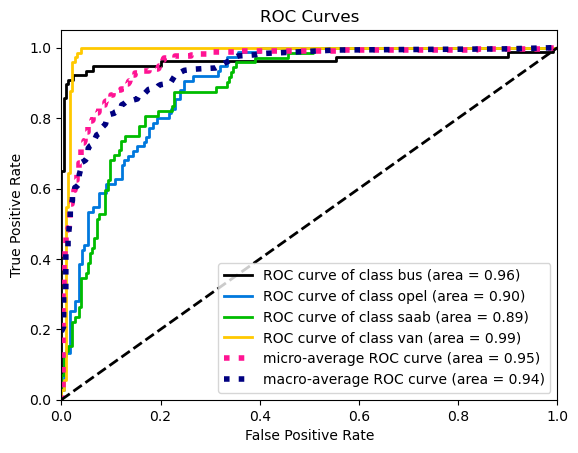

In [18]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
import scikitplot as skplt

param_grid = {
    'C': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2']
}
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

warnings.filterwarnings('ignore')
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
warnings.filterwarnings('default')
print("Best Parameters: ", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

predicted_proba = grid_search.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_proba)

In [19]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot

C:\Users\immor\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\immor\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\immor\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

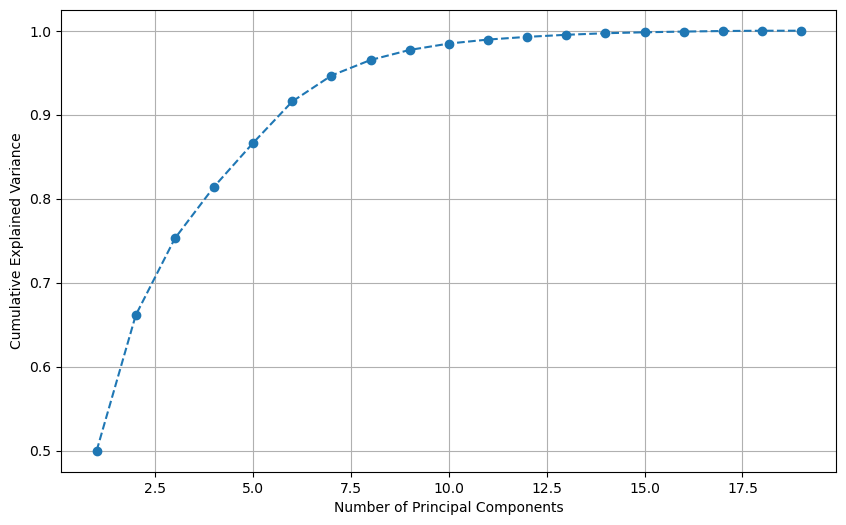

In [21]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [23]:
### YOUR CODE HERE
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Parameters:  {'C': 10, 'penalty': 'l2'}
F1 Score:  0.70032625826054
Accuracy:  0.7070707070707071


C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
C:\Users\immor\anaconda3\Lib\site-packages\scikitplot\metrics.py:418: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

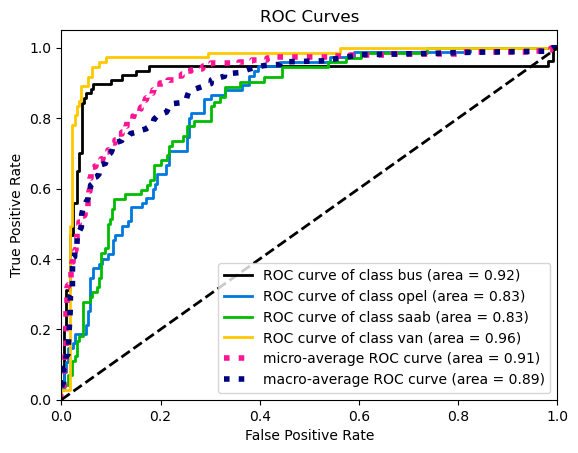

In [26]:
### YOUR CODE HERE
param_grid = {
    'C': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 10, 100],
    'penalty': ['l2', 'l1']
}
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

warnings.filterwarnings('ignore')
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_pca, y_train)
warnings.filterwarnings('default')
print("Best Parameters: ", grid_search.best_params_)


y_pred = grid_search.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

predicted_proba = grid_search.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, predicted_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
param_grid = {
    'max_depth': range(1, X_train.shape[1])
}
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree, average='macro')
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Best Max Depth:", best_max_depth)
print("Decision Tree F1 Score:", f1_tree)
print("Decision Tree Acc:", accuracy_tree)

Best Max Depth: 16
Decision Tree F1 Score: 0.7335025934860874
Decision Tree Acc: 0.7373737373737373


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [30]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

ensemble_sizes = range(2, 101, 5)
f1_scores_lr = []
accuracy_scores_lr = []
f1_scores_dt = []
accuracy_scores_dt = []

for ensemble_size in ensemble_sizes:
    ensemble_lr = BaggingClassifier(estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1000, penalty='l1'), n_estimators=ensemble_size, random_state=42)
    ensemble_lr.fit(X_train, y_train)
    y_pred_lr = ensemble_lr.predict(X_test)
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average='macro'))
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    
    ensemble_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=ensemble_size, random_state=42)
    ensemble_dt.fit(X_train, y_train)
    y_pred_dt = ensemble_dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average='macro'))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_dt))

C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default valu

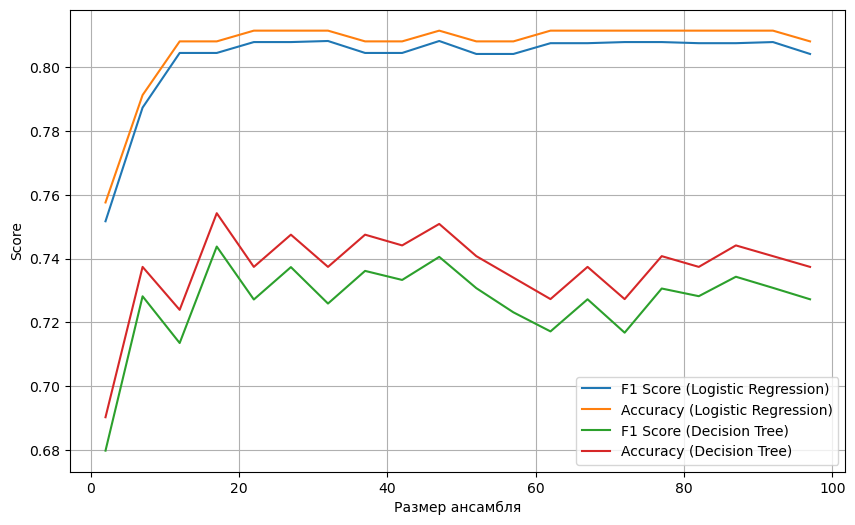

optimal number of LR is  32
optimal number of DT is  17


In [64]:
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, f1_scores_lr, label='F1 Score (Logistic Regression)')
plt.plot(ensemble_sizes, accuracy_scores_lr, label='Accuracy (Logistic Regression)')
plt.plot(ensemble_sizes, f1_scores_dt, label='F1 Score (Decision Tree)')
plt.plot(ensemble_sizes, accuracy_scores_dt, label='Accuracy (Decision Tree)')
plt.xlabel('Размер ансамбля')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

best_n_lr = ensemble_sizes[np.argmax(f1_scores_lr[:8])]
print('optimal number of LR is ', best_n_lr)
best_n_dt = ensemble_sizes[np.argmax(f1_scores_dt[:5])]
print('optimal number of DT is ', best_n_dt)

DT хватает  17,  LR понадобится примерно 32. Вроде по числу моделей разница не особо большая, но LR всё равно выигрывает. LR – тупая линейная модель. И на не особо сложных данных эта простота предпочтительнее. Более сложные модели начинают строить сложные границы и переобучаются.
бэггинг над деревьямиь это  случайный лес, ограничивать глубину деревьев особого смысла нет. Потому что если одно дерево и переобучится, то остальные  скомпенсируют. Что,  и показывают, задрав max_depth до 1000 

In [69]:
ensemble_sizes = range(2, 101, 5)
f1_scores_lr = []
accuracy_scores_lr = []
f1_scores_dt = []
accuracy_scores_dt = []

for ensemble_size in ensemble_sizes:
    ensemble_lr = BaggingClassifier(estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1000, penalty='l1'), n_estimators=ensemble_size, random_state=42)
    ensemble_lr.fit(X_train, y_train)
    y_pred_lr = ensemble_lr.predict(X_test)
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average='macro'))
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    
    ensemble_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1000), n_estimators=ensemble_size, random_state=42)
    ensemble_dt.fit(X_train, y_train)
    y_pred_dt = ensemble_dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average='macro'))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_dt))


C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default valu

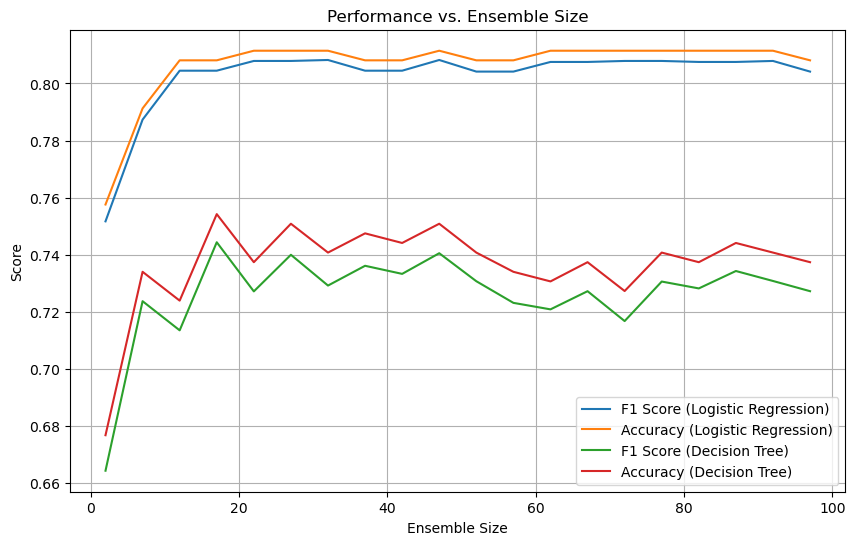

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, f1_scores_lr, label='F1 Score (Logistic Regression)')
plt.plot(ensemble_sizes, accuracy_scores_lr, label='Accuracy (Logistic Regression)')
plt.plot(ensemble_sizes, f1_scores_dt, label='F1 Score (Decision Tree)')
plt.plot(ensemble_sizes, accuracy_scores_dt, label='Accuracy (Decision Tree)')
plt.xlabel('Ensemble Size')
plt.ylabel('Score')
plt.title('Performance vs. Ensemble Size')
plt.legend()
plt.grid()
plt.show()

In [74]:
best_n_lr = ensemble_sizes[np.argmax(f1_scores_lr[:8])]
print('optimal number of LR is ', best_n_lr)
best_n_dt = ensemble_sizes[np.argmax(f1_scores_dt[:10])]
print('optimal number of DT is ', best_n_dt)

optimal number of LR is  32
optimal number of DT is  17


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
n_trees = range(1, 101, 5)
f1_scores = []
accuracy_scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred_rf, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred_rf))

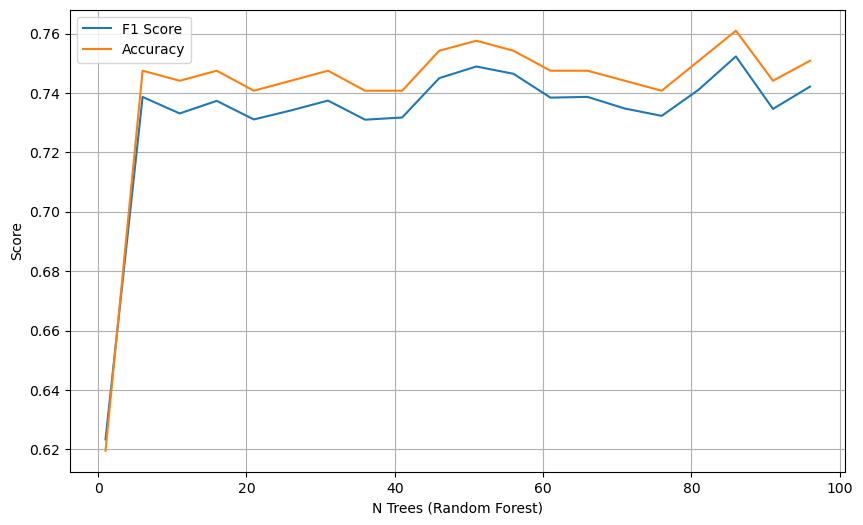

Оптимальное количество:  6


In [33]:
plt.figure(figsize=(10, 6))
plt.plot(n_trees, f1_scores, label='F1 Score')
plt.plot(n_trees, accuracy_scores, label='Accuracy')
plt.xlabel('N Trees (Random Forest)')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

best_n_trees = n_trees[np.argmax(f1_scores[:6])]
print('Оптимальное количество: ', best_n_trees)

Оптимальное число деревьев в RF составляет 16 [???], в  бэгинге больше. Скорее всего, из-за того, что RF по дефолту не просто деревья строит, а ещё и сэмплирует по батчам и по фичам. Плюс глубину дерева в RF можно особо не зажимать, потому что переобучение одного дерева не стьрашно -- оно переобучится, но это компенсируется переобучением другого дерева. Все эти манипуляции с сэмплированием по батчам и фичам нужны чтобы bias–variance tradeoff привести в. каждое дерево видит только кусок данных и кучку фичей. Из-за этого получается более устойчивая ситуцаия, но при этом внутри всё довольно просто.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [36]:
# YOUR CODE HERE
accuracy_lr = []
f1_lr = []
accuracy_dt = []
f1_dt = []
accuracy_rf = []
f1_rf = []

part = int(np.floor(X_train.shape[0]/10))
for i in range(1, 11):
    combined_X_train = X_train[:i*part]
    combined_y_train = y_train[:i*part]
        
    lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1000, penalty='l1')
    lr.fit(combined_X_train, combined_y_train)
    
    dt = DecisionTreeClassifier(max_depth=best_max_depth)
    dt.fit(combined_X_train, combined_y_train)
    
    rf = RandomForestClassifier(n_estimators=best_n_trees, random_state=42)
    rf.fit(combined_X_train, combined_y_train)
    
    y_pred_lr = lr.predict(X_test)
    accuracy_lr.append(accuracy_score(y_test, y_pred_lr))
    f1_lr.append(f1_score(y_test, y_pred_lr, average='macro'))
    
    y_pred_dt = dt.predict(X_test)
    accuracy_dt.append(accuracy_score(y_test, y_pred_dt))
    f1_dt.append(f1_score(y_test, y_pred_dt, average='macro'))
    
    y_pred_rf = rf.predict(X_test)
    accuracy_rf.append(accuracy_score(y_test, y_pred_rf))
    f1_rf.append(f1_score(y_test, y_pred_rf, average='macro'))


C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\immor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

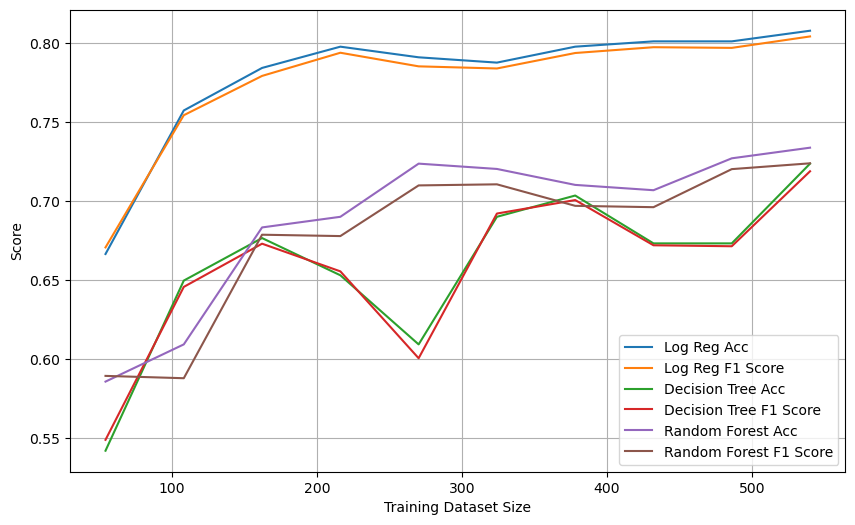

In [37]:
dataset_sizes = [i*part for i in range(1, 11)]

plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, accuracy_lr, label='Log Reg Acc')
plt.plot(dataset_sizes, f1_lr, label='Log Reg F1 Score')
plt.plot(dataset_sizes, accuracy_dt, label='Decision Tree Acc')
plt.plot(dataset_sizes, f1_dt, label='Decision Tree F1 Score')
plt.plot(dataset_sizes, accuracy_rf, label='Random Forest Acc')
plt.plot(dataset_sizes, f1_rf, label='Random Forest F1 Score')
plt.xlabel('Training Dataset Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Чем больше обучающей выборки, тем, как правило, модели начинают работать лучше. Но LR и RF где-то после 400 примеров упираются в потолок. DT наоборот, начинает скатываться потому что переобучается на этих больших выборках.  одиночное решающее дерево заучивает всё подряд.Можно фиксить, задав `max_depth` задать.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [40]:
# YOUR CODE HERE